In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-11-14 13:54:25--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.26, 104.192.142.25, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-11-14 13:54:33 (16.4 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [4]:
import tensorflow as tf


In [5]:
import matplotlib.pyplot as plt

In [6]:
img_height,img_width = 32,32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/validation',
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Class names: ['apple', 'banana', 'orange']


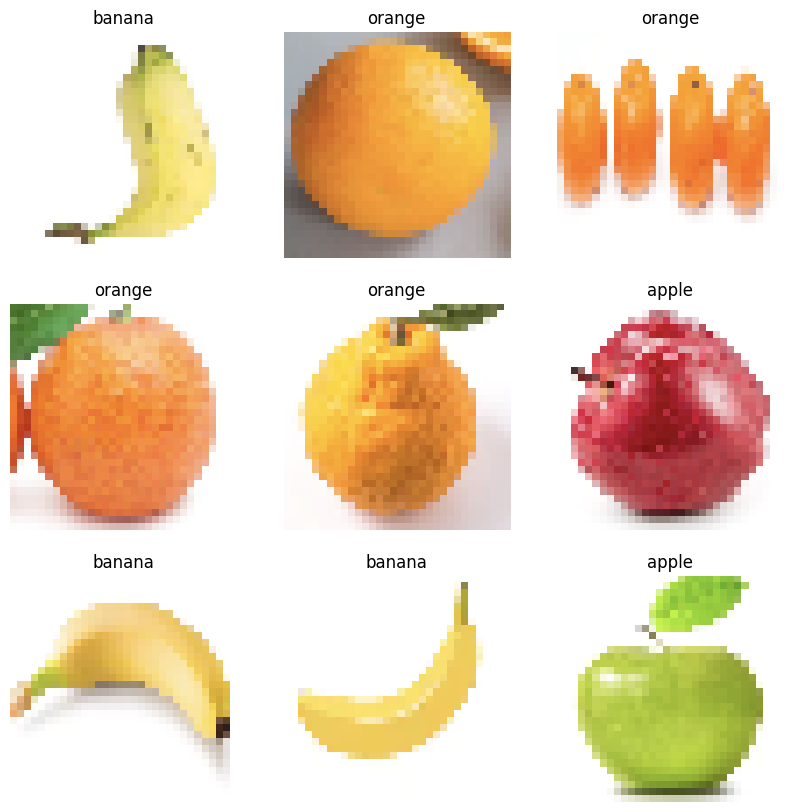

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()

### Build and compile the CNN model

In [9]:
from tensorflow.keras import layers

num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,171 (606.14 KB)

 Trainable params: 155,171 (606.14 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print(history.history)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.4236 - loss: 1.0630 - val_accuracy: 0.6818 - val_loss: 0.8012
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7616 - loss: 0.6999 - val_accuracy: 0.9091 - val_loss: 0.3950
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8777 - loss: 0.3154 - val_accuracy: 0.9242 - val_loss: 0.3313
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8773 - loss: 0.2823 - val_accuracy: 0.8182 - val_loss: 0.5266
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9287 - loss: 0.2087 - val_accuracy: 0.9394 - val_loss: 0.2764
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9435 - loss: 0.1660 - val_accuracy: 0.8030 - val_loss: 0.5254
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9183 - loss: 0.2074 - val_accuracy: 0.8788 - val_loss: 0.4086
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9316 - loss: 0.1733 - val_accuracy: 0.8788 - 

### Evaluate the model

In [11]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.9314 - loss: 0.2470
Test Loss: 0.1945
Test Accuracy: 0.9385


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


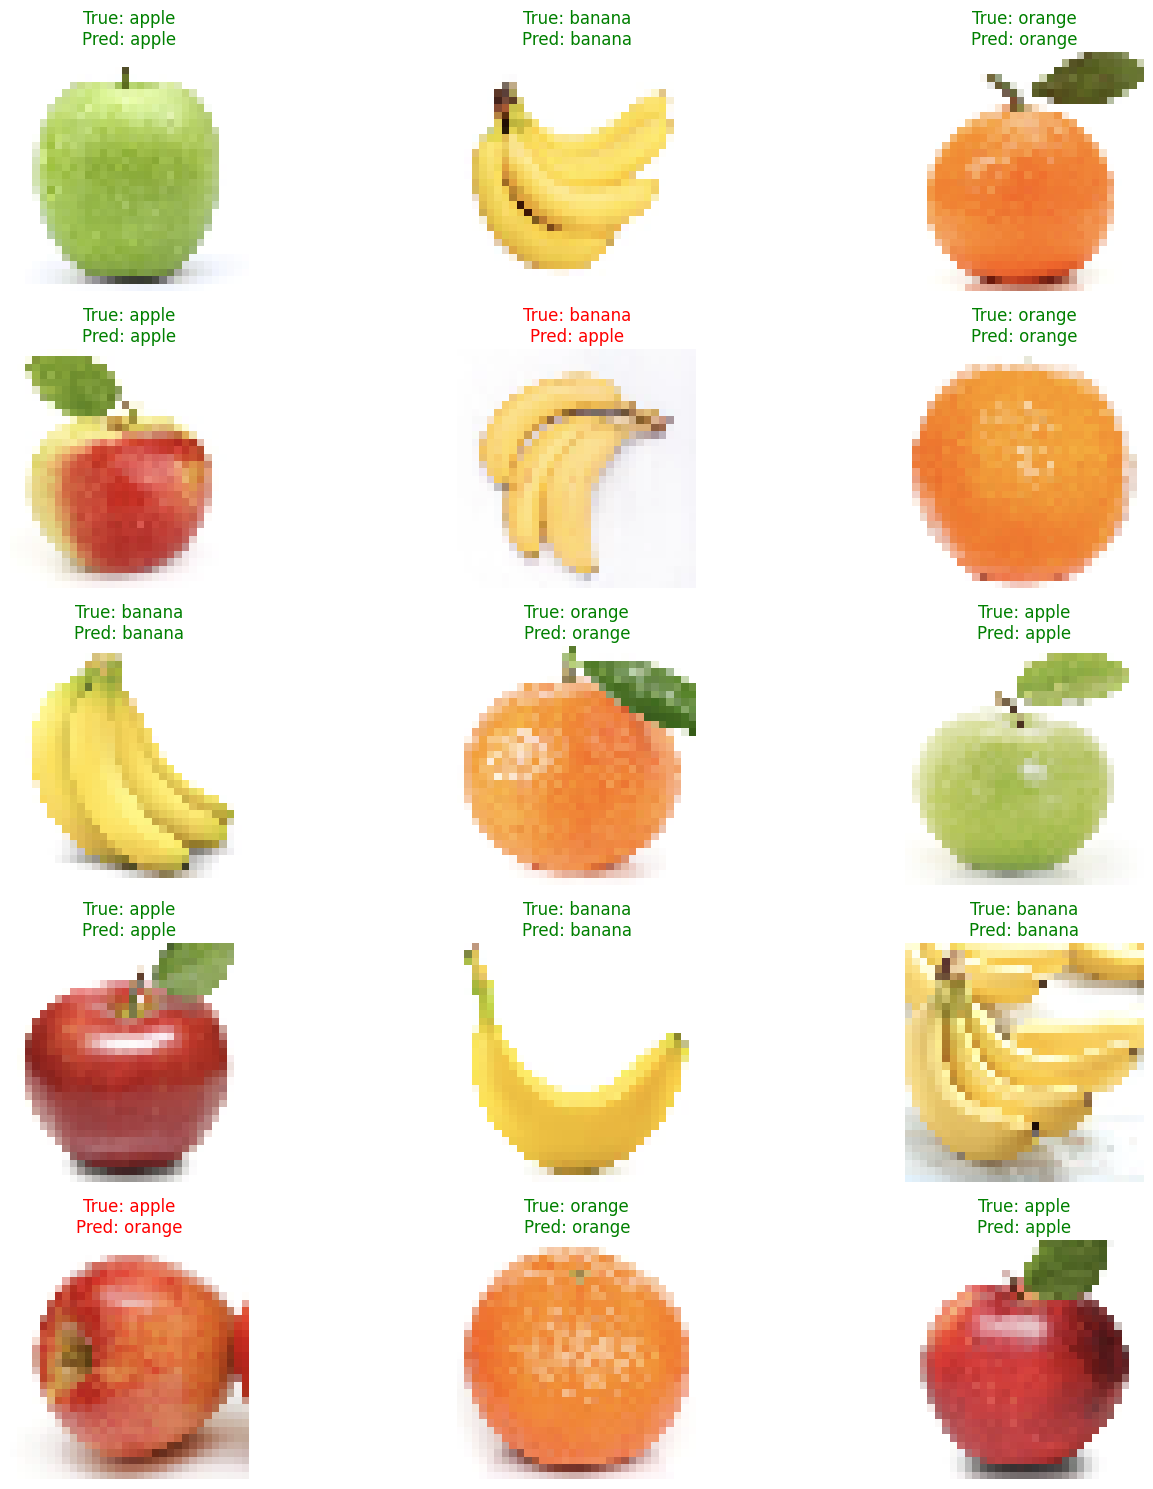

In [15]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_display = 15

# Collect all images and labels from the test_ds
all_test_images = []
all_test_labels = []
for images_batch, labels_batch in test_ds:
    all_test_images.extend(images_batch.numpy())
    all_test_labels.extend(labels_batch.numpy())

# Ensure at least one of each required class is selected, if available
selected_indices = []
classes_found = {name: False for name in class_names}
class_indices_map = {name: idx for idx, name in enumerate(class_names)}

# First, try to get one of each required class
for class_name_to_find in ['apple', 'banana', 'orange']:
    class_idx = class_indices_map[class_name_to_find]
    for i, label_one_hot in enumerate(all_test_labels):
        true_label_index = tf.argmax(label_one_hot).numpy()
        if true_label_index == class_idx and not classes_found[class_name_to_find] and i not in selected_indices:
            selected_indices.append(i)
            classes_found[class_name_to_find] = True
            if len(selected_indices) == num_images_to_display:
                break
    if len(selected_indices) == num_images_to_display:
        break

# If we haven't reached num_images_to_display yet, fill with other random images
remaining_indices = [i for i in range(len(all_test_images)) if i not in selected_indices]
np.random.shuffle(remaining_indices)

while len(selected_indices) < num_images_to_display and len(remaining_indices) > 0:
    selected_indices.append(remaining_indices.pop(0))

# Take the first 'num_images_to_display' from the selected_indices
final_indices = selected_indices[:num_images_to_display]

# Prepare the actual images and labels for prediction and plotting
actual_images_for_plot = np.array([all_test_images[i] for i in final_indices])
actual_labels_for_plot = np.array([all_test_labels[i] for i in final_indices])

# Make predictions on the selected images
predictions_for_plot = model.predict(actual_images_for_plot)

plt.figure(figsize=(15, 15))
for i in range(len(final_indices)):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(actual_images_for_plot[i].astype("uint8"))

    true_label_index = tf.argmax(actual_labels_for_plot[i]).numpy()
    predicted_label_index = tf.argmax(predictions_for_plot[i]).numpy()

    true_label = class_names[true_label_index]
    predicted_label = class_names[predicted_label_index]

    color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Convert the Keras model to TensorFlow Lite format

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('fruit_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved as 'fruit_classifier.tflite'")

Saved artifact at '/tmp/tmpqv54gmrg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133896896095312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896097616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896099152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896096848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896099536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896099344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896099728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896097040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896098384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133896896100112: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite mo